<a href="https://colab.research.google.com/github/datgerhardt/ml-foundations/blob/main/perceptron_multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%pylab inline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Data preprocessing
from tensorflow.keras.datasets import mnist 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = [x/255 for x in [x_train, x_test]]
y_train, y_test = [tf.keras.utils.to_categorical(x) for x in [y_train, y_test]]
num_classes = 10
img_width, img_height = x_train.shape[1], x_train.shape[2]
print("X : ",x_train.shape, x_test.shape)
print("Y : ",y_train.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
X :  (60000, 28, 28) (10000, 28, 28)
Y :  (60000, 10) (10000, 10)


In [15]:
# create model
model=Sequential()
model.add(Flatten(input_shape=(img_width,img_height)))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='mse', optimizer='adam',
                metrics=['accuracy'])
hist = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))


Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0240 - accuracy: 0.8358 - val_loss: 0.0091 - val_accuracy: 0.9418
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0153 - accuracy: 0.8988 - val_loss: 0.0072 - val_accuracy: 0.9523
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0135 - accuracy: 0.9111 - val_loss: 0.0067 - val_accuracy: 0.9562
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0123 - accuracy: 0.9195 - val_loss: 0.0059 - val_accuracy: 0.9620
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0118 - accuracy: 0.9226 - val_loss: 0.0054 - val_accuracy: 0.9643
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0113 - accuracy: 0.9263 - val_loss: 0.0055 - val_accuracy: 0.9649
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0108 - accuracy: 0.9298 - val_loss: 0.0053 - val_accuracy:

In [4]:
def display(history):
  plt.subplot(1,2,1)
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  # summarize history for loss
  plt.subplot(1,2,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')


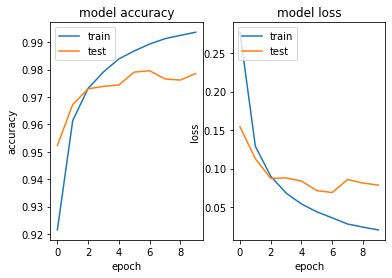

In [6]:
display(hist)

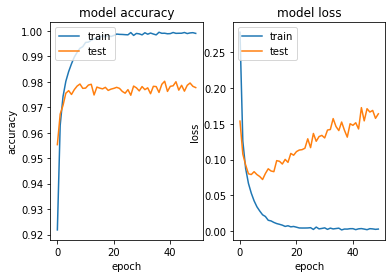

In [8]:
display(hist) # training for 50 epochs

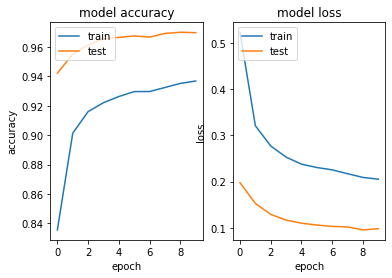

In [12]:
display(hist) # Adding dropout

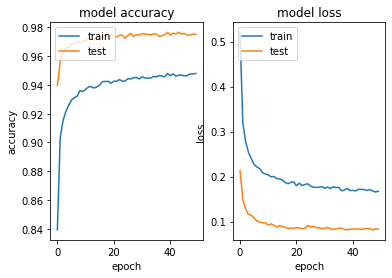

In [10]:
display(hist) # Adding dropout for 50 epochs

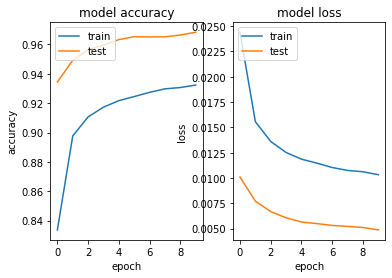

In [14]:
display(hist) # change loss categorical cross entropy to mse activation func for 10 epochs

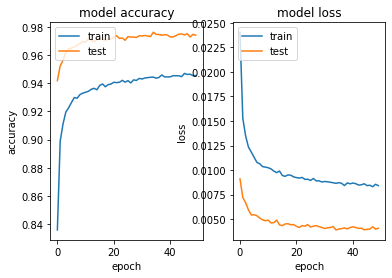

In [16]:
display(hist) # change loss categorical cross entropy to mse activation func for 50 epochs